In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import pickle
import math

# Regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [32]:
df = pd.read_csv(r"C:\Guvi\Project\Singapore - Resale Flat Prices\All_Data.csv")
df.dtypes

C:\Users\winne\AppData\Local\Temp\ipykernel_18044\928112779.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Guvi\Project\Singapore - Resale Flat Prices\All_Data.csv")


month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

Changing the datatype

In [33]:
df['month'] = pd.to_datetime(df['month'], format='%Y-%m', errors='coerce')
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'], format='%Y', errors='coerce')
df['lease_commence_date'] = df['lease_commence_date'].dt.year

In [34]:
df.drop(['remaining_lease','block','street_name'], axis=1, inplace=True)
df.head(1)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990


In [35]:
df.lease_commence_date.unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020])

In [36]:
flat_model = ['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen']

town = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL']

flat_type = ['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION']

storey_range = ['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51']

lease_commence_date = [1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020]

In [37]:
df.columns

Index(['month', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'year'],
      dtype='object')

Label Encoding the object datatype

Removing Outliers

In [38]:
# Calculate the IQR
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

# Set a scaling factor (adjust as needed)
k = 1.5

# Define the lower and upper bounds
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Clip the outliers to the bounds
df['floor_area_sqm'] = df['floor_area_sqm'].clip(lower=lower_bound, upper=upper_bound)

In [39]:
df.floor_area_sqm.max()

173.0

In [40]:
# Calculate the IQR
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

# Set a scaling factor (adjust as needed)
k = 1.5

# Define the lower and upper bounds
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Clip the outliers to the bounds
df['resale_price'] = df['resale_price'].clip(lower=lower_bound, upper=upper_bound)

In [41]:
df.head(1)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990


In [42]:
# Columns to be label encoded
columns_to_encode = ['town', 'flat_type', 'storey_range', 'flat_model']
# Initialize LabelEncoders for each column
label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Save the label encoders to a pickle file
with open(r'C:\Guvi\Project\Singapore - Resale Flat Prices\resale_label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

In [50]:
with open(r'C:\Guvi\Project\Singapore - Resale Flat Prices\resale_label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

# Your new input data
new_data = {
    'town': ['BEDOK'],
    'flat_type': ['3 ROOM'],
    'storey_range': ['04 TO 06'],
    'flat_model': ['NEW GENERATION']
}

# Create a DataFrame from the new input data
new_df = pd.DataFrame(new_data)

# Apply label encoding using the loaded label encoders
for column, le in label_encoders.items():
    if column in new_df.columns:
        new_df[column] = le.transform(new_df[column])

# Display the label-encoded new input
town_value = new_df['town'].iloc[0]
print(town_value)

1


In [53]:
df.head(1)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,0,0,5,31.0,7,1977,9000.0,1990


In [51]:

le = LabelEncoder()
df['town'] = le.fit_transform(df['town'])
df['flat_type'] = le.fit_transform(df['flat_type'])
df['storey_range'] = le.fit_transform(df['storey_range'])
df['flat_model'] = le.fit_transform(df['flat_model'])

X = df.drop(['resale_price',],axis=1)
y = df['resale_price']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = DecisionTreeRegressor()


model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)



# Save the trained model using pickle
with open(r'C:\Guvi\Project\Industrial Copper Modeling\resaleprice_model_regressor.pkl', 'wb') as file:
    pickle.dump(model, file)
   

In [66]:
df.head(1)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,0,0,5,31.0,7,1977,9000.0,1990


In [67]:
with open(r'C:\Guvi\Project\Industrial Copper Modeling\resaleprice_model_regressor.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded_model for predictions

# Example input data (replace this with your own input data)
new_input = [[1,'BEDOK','3 ROOM','25 TO 27',59,'Multi Generation',2001,1999]]

# Make predictions
result = loaded_model.predict(new_input)

# Print the result
print("Prediction:", result)

c:\Users\winne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'BEDOK'

In [ ]:
X = df.drop(['resale_price',],axis=1)
y = df['resale_price']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

models = [LinearRegression(),KNeighborsRegressor(n_neighbors=3),DecisionTreeRegressor(),Lasso(),Ridge()]

for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print("*****",model,"*****")
    print("*****MSE*****")
    print(f"Train error: {math.sqrt(mean_squared_error(y_train,train_pred))}")
    print(f"Test error: {math.sqrt(mean_squared_error(y_test,test_pred))}")
    print("*****R2*****")
    print(f"Train R squared value: {(r2_score(y_train,train_pred))}")
    print(f"Test R squared value: {(r2_score(y_test,test_pred))}")
    print("\n")

In [52]:
df.head(1)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,0,0,5,31.0,7,1977,9000.0,1990


In [115]:
file_list = [r"C:\Guvi\Project\Singapore - Resale Flat Prices\19901999.csv",r"C:\Guvi\Project\Singapore - Resale Flat Prices\2000Feb2012.csv",
            r"C:\Guvi\Project\Singapore - Resale Flat Prices\Mar2012toDec2014.csv",r"C:\Guvi\Project\Singapore - Resale Flat Prices\Jan2015toDec2016.csv",
            r"C:\Guvi\Project\Singapore - Resale Flat Prices\Jan2017onwards.csv"]
df_list = [pd.read_csv(file) for file in file_list]
merged_df = pd.concat(df_list, axis=0, ignore_index=True)
merged_df.to_csv(r"C:\Guvi\Project\Singapore - Resale Flat Prices\All_Data.csv", index=False)


PermissionError: [Errno 13] Permission denied: 'C:\\Guvi\\Project\\Singapore - Resale Flat Prices\\All_Data.csv'

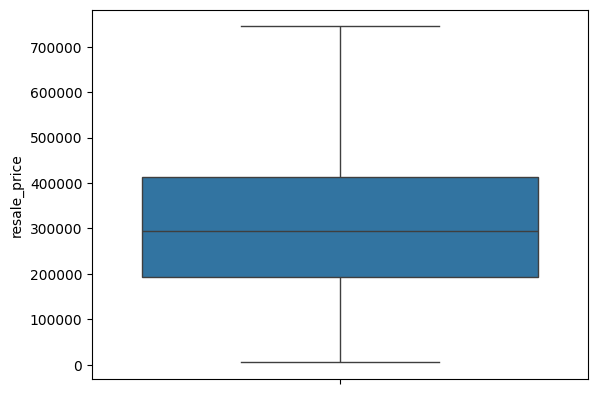

In [60]:
sns.boxplot(df,y="resale_price")
plt.show()